In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("train_FD002.txt",sep=" ",names=columns)   ## to read txt into dataframe
test=pd.read_csv("test_FD002.txt",sep=" ",names=columns)
test_result=pd.read_csv("RUL_FD002.txt",sep=" ",header=None)

In [4]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [5]:
test.head() # to print first 5 records in your dataset

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN


In [6]:
test_result.head()

,0,1
0,18,NaN
1,79,NaN
2,106,NaN
3,110,NaN
4,15,NaN


In [7]:
train.info() # to get info of your dataset ex: null values,datatype..,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        53759 non-null  int64  
 1   cycle     53759 non-null  int64  
 2   op1       53759 non-null  float64
 3   op2       53759 non-null  float64
 4   op3       53759 non-null  float64
 5   sensor1   53759 non-null  float64
 6   sensor2   53759 non-null  float64
 7   sensor3   53759 non-null  float64
 8   sensor4   53759 non-null  float64
 9   sensor5   53759 non-null  float64
 10  sensor6   53759 non-null  float64
 11  sensor7   53759 non-null  float64
 12  sensor8   53759 non-null  float64
 13  sensor9   53759 non-null  float64
 14  sensor10  53759 non-null  float64
 15  sensor11  53759 non-null  float64
 16  sensor12  53759 non-null  float64
 17  sensor13  53759 non-null  float64
 18  sensor14  53759 non-null  float64
 19  sensor15  53759 non-null  float64
 20  sensor16  53759 non-null  fl

In [8]:
print("Machine ID", train.id.unique())

Machine ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

## Engine cycle Lifetime

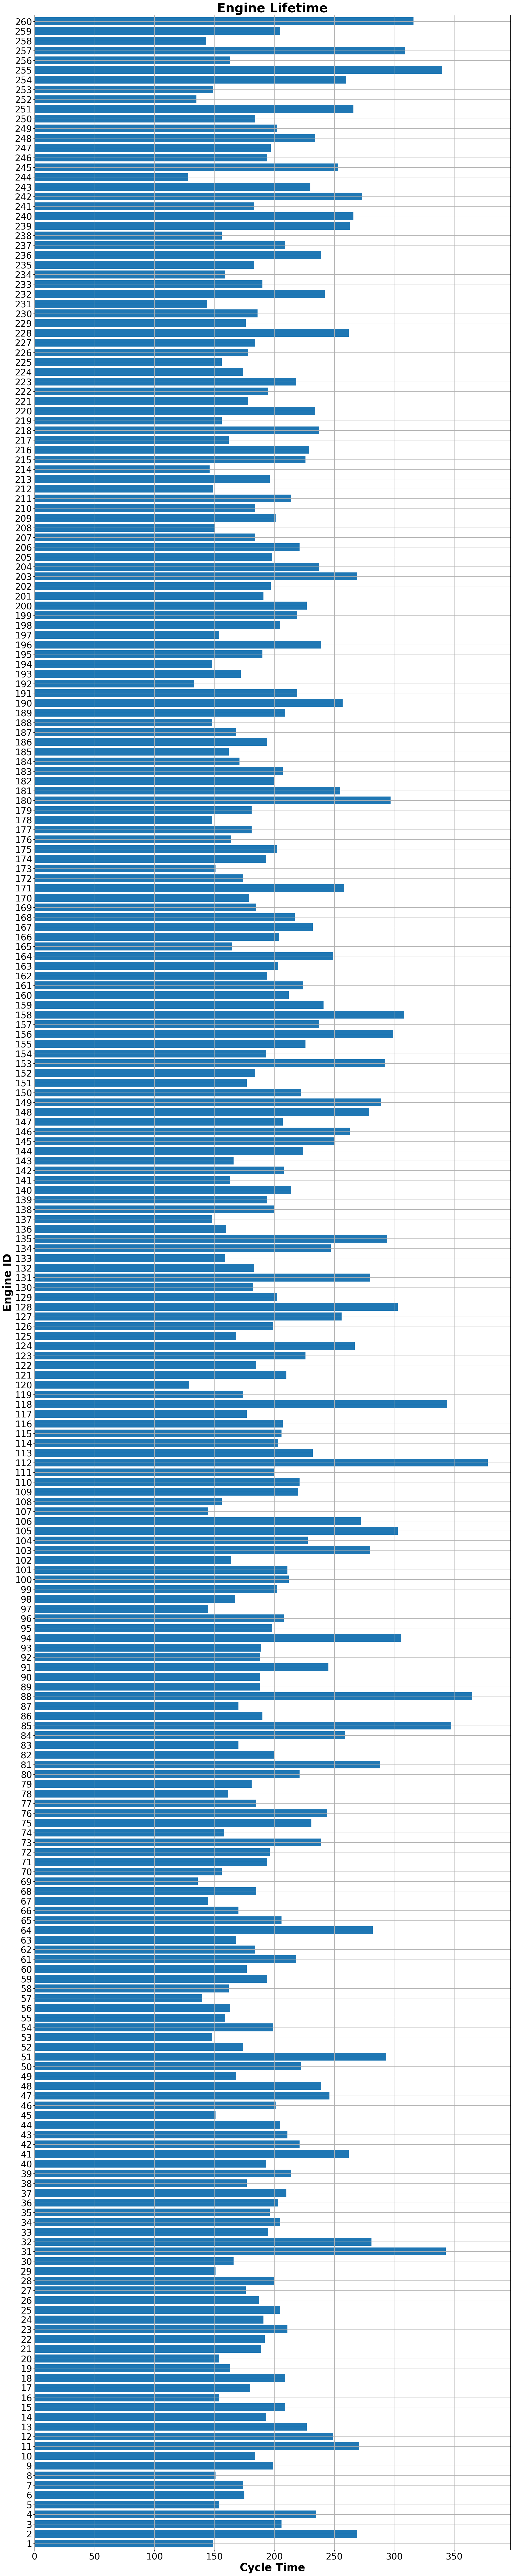

In [9]:
plt.figure(figsize=(20,100))
ax=train.groupby('id')['cycle'].max().plot(kind="barh",width=0.8,stacked=True,align='center',rot=0)
plt.title("Engine Lifetime",fontweight='bold',size=35)
plt.xlabel("Cycle Time",fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
test_result.columns=["rul","null"]
test_result.head()

,rul,null
0,18,NaN
1,79,NaN
2,106,NaN
3,110,NaN
4,15,NaN


In [11]:
test_result.drop(["null"],axis=1,inplace=True)
test_result["id"]=test_result.index+1
test_result.head()

,rul,id
0,18,1
1,79,2
2,106,3
3,110,4
4,15,5


In [12]:
rul=pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']

In [13]:
rul.head()

,id,max
0,1,258
1,2,55
2,3,165
3,4,86
4,5,148


In [14]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [15]:

test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

,rul,id,rul_failed
0,18,1,276
1,79,2,134
2,106,3,271
3,110,4,196
4,15,5,163


In [16]:
test_result.drop(['rul'],axis=1,inplace=True)

In [17]:
test=test.merge(test_result,on=['id'],how='left')

In [18]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN,276,275
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN,276,274
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN,276,273
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN,276,272
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN,276,271


In [19]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           33991
sensor23           33991
rul_failed             0
remaining_cycle        0
dtype: int64

In [20]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [21]:
df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

C:\Users\Drl\AppData\Local\Temp\ipykernel_17948\3935731721.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']


In [22]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


In [23]:
cycle=30
df_train['label']=df_train["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)
df_test['label']=df_test["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)

In [24]:
df_train

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147,0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146,0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145,0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,4,1
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,3,1
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,2,1
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,1,1


In [25]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

C:\Users\Drl\AppData\Local\Temp\ipykernel_17948\533231173.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Drl\AppData\Loca

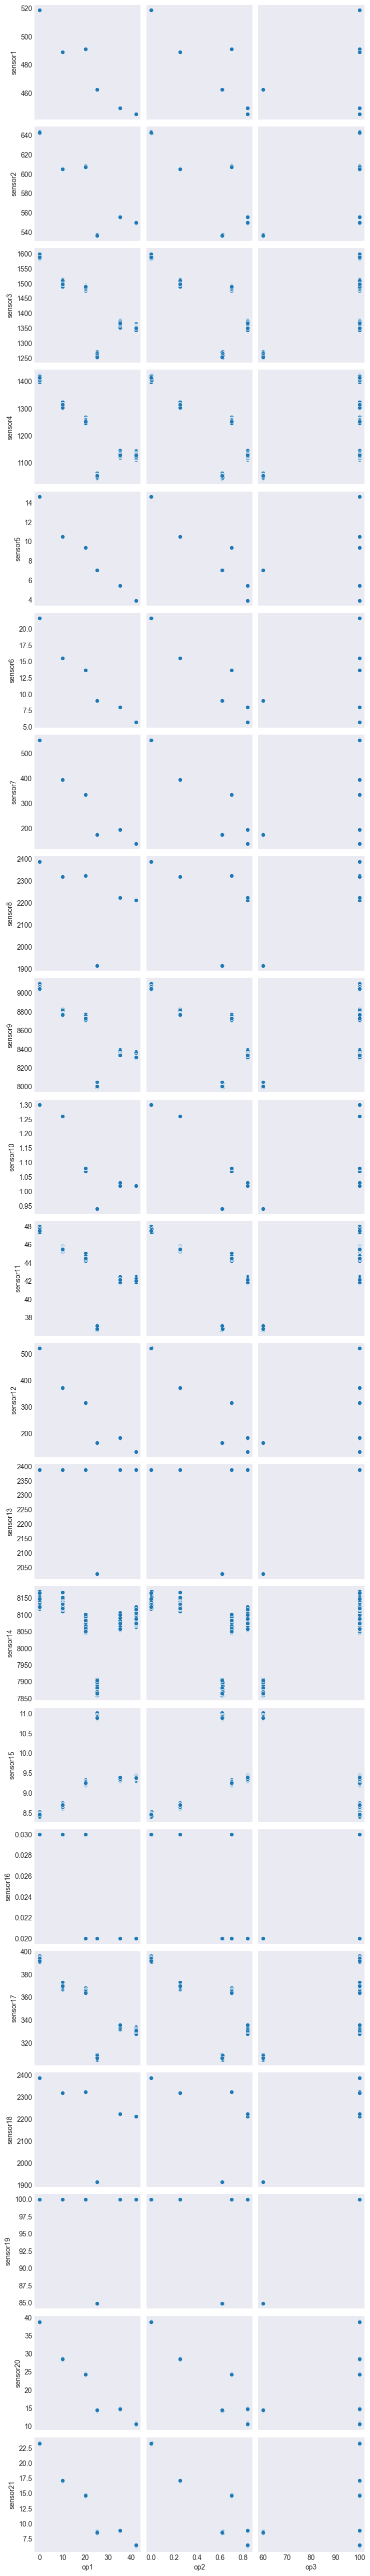

In [26]:
plt.style.use("seaborn-dark")
ax=sns.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="hus1")

In [27]:
df_test.shape

(33991, 29)

In [28]:
df_test.drop(["id","op3","sensor13","sensor18","sensor19"],axis=1,inplace=True)

In [29]:
x=df_train.drop(["id","op3","sensor13","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label

print('x shape :',x.shape)
print('y shape :',y.shape)

x shape : (53759, 21)
y shape : (53759,)


In [30]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148,0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147,0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146,0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145,0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144,0


In [31]:
x.head(5)

,cycle,op1,op2,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor9,sensor10,sensor11,sensor12,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21
0,1,34.9983,0.8400,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,...,8341.91,1.02,42.02,183.06,8048.56,9.3461,0.02,334,14.73,8.8071
1,2,41.9982,0.8408,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,...,8303.96,1.02,42.20,130.42,8072.30,9.3774,0.02,330,10.41,6.2665
2,3,24.9988,0.6218,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,...,8001.42,0.94,36.69,164.22,7864.87,10.8941,0.02,309,14.08,8.6723
3,4,42.0077,0.8416,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,...,8303.96,1.02,41.96,130.72,8068.66,9.3528,0.02,329,10.59,6.4701
4,5,25.0005,0.6203,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,...,7993.23,0.94,36.89,164.31,7861.23,10.8963,0.02,309,14.13,8.5286


In [32]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Model creation

## classification

In [33]:
x=df_train.drop(["id","cycle","op3","sensor13","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (53759, 20)
y shape :  (53759,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
print('X_train shape : ',x_train.shape)
print('X_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (43007, 20)
X_test shape :  (10752, 20)
y_train shape :  (43007,)
y_test shape :  (10752,)


## Model-1 : Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [36]:
lr_classifier=LogisticRegression(n_jobs=-1)
lr_classifier.fit(x_train,y_train)
lr_classifier.score(x_test,y_test)
pred=lr_classifier.predict(x_test)

print("Acc sore: ",accuracy_score(y_test,pred))
print("Roc Auc Score: ",roc_auc_score(y_test,pred))
print("precision score: ", precision_score(y_test,pred))
print("Recall score: ",recall_score(y_test,pred))


Acc sore:  0.8936941964285714
Roc Auc Score:  0.67818710763271
precision score:  0.8043478260869565
Recall score:  0.37209302325581395


In [37]:
df_test

,cycle,op1,op2,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21,rul_failed,remaining_cycle,label
0,1,9.9987,0.2502,489.05,605.03,1497.17,1304.99,10.52,15.49,394.54,...,371.69,8114.10,8.6476,0.03,369,28.42,17.1551,276,275,0
1,2,20.0026,0.7000,491.19,607.82,1481.20,1246.11,9.35,13.66,334.36,...,315.32,8053.06,9.2405,0.02,364,24.29,14.8039,276,274,0
2,3,35.0045,0.8400,449.44,556.00,1359.08,1128.36,5.48,8.00,193.55,...,183.04,8053.04,9.3472,0.02,333,14.98,8.9125,276,273,0
3,4,42.0066,0.8410,445.00,550.17,1349.69,1127.89,3.91,5.71,138.74,...,130.40,8066.90,9.3961,0.02,332,10.35,6.4181,276,272,0
4,5,24.9985,0.6213,462.54,536.72,1253.18,1050.69,7.05,9.03,175.75,...,164.56,7865.66,10.8682,0.02,305,14.31,8.5740,276,271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,119,35.0015,0.8403,449.44,555.56,1366.01,1129.47,5.48,8.00,194.87,...,183.05,8088.36,9.3215,0.02,334,14.94,8.9065,174,55,0
33987,120,42.0066,0.8405,445.00,549.42,1351.13,1123.86,3.91,5.72,138.34,...,130.74,8108.48,9.3542,0.02,332,10.57,6.4075,174,54,0
33988,121,42.0061,0.8400,445.00,549.65,1349.14,1118.91,3.91,5.72,138.27,...,130.96,8098.77,9.3836,0.02,331,10.57,6.4805,174,53,0
33989,122,0.0024,0.0003,518.67,642.58,1589.61,1408.16,14.62,21.61,553.13,...,522.25,8161.85,8.4279,0.03,393,39.08,23.3589,174,52,0


In [39]:
df_temp_pred = df_test.drop(["rul_failed","remaining_cycle","label","cycle"],axis=1)
df_test_pred= lr_classifier.predict(df_temp_pred)
cm=confusion_matrix(df_test.iloc[:,-1],df_test_pred,labels=None,sample_weight=None)

<Axes: >

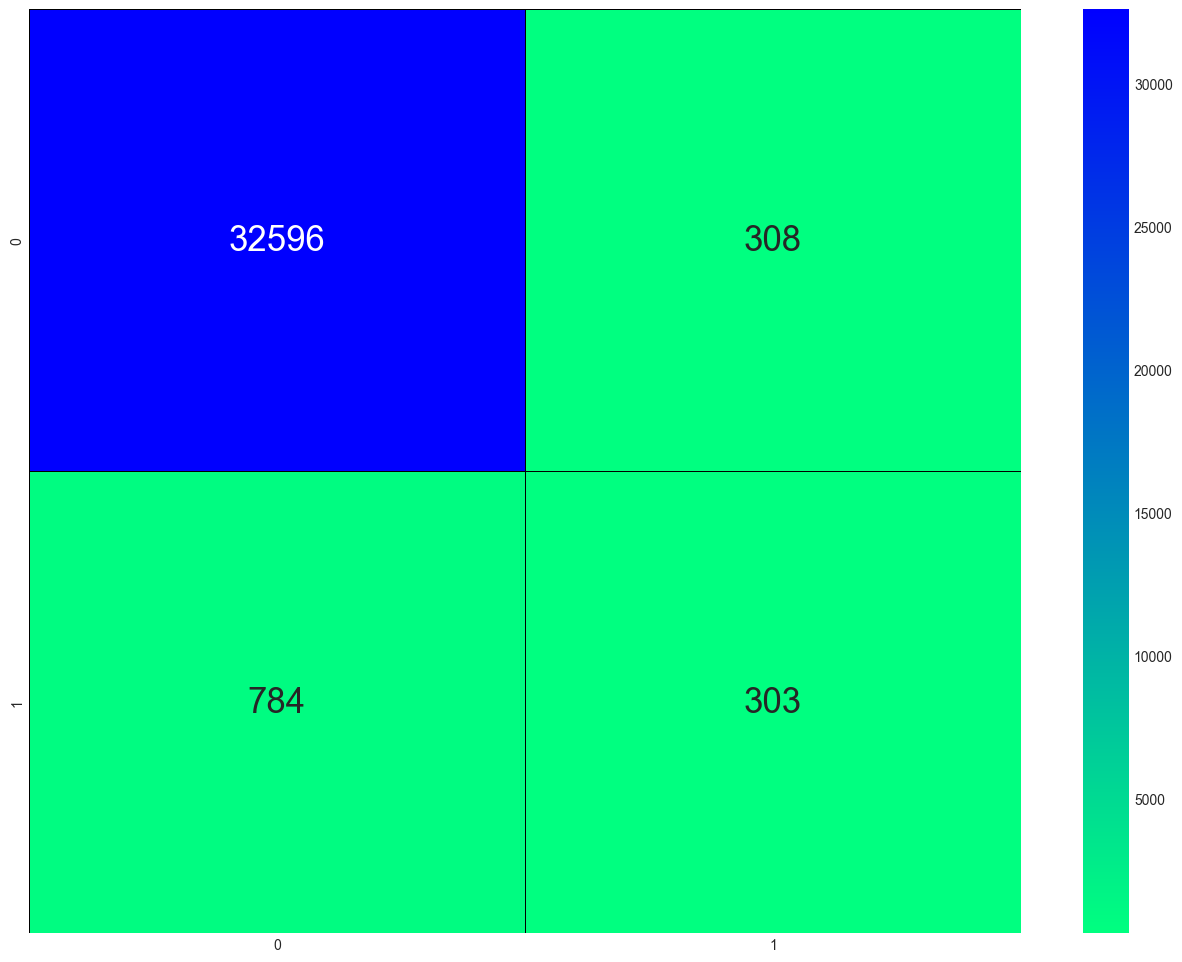

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(cm,annot=True,annot_kws={"size":25},linewidth=0.7,linecolor="black",cmap="winter_r",fmt="d")